# Pandas IV: Time Series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### Problem 1

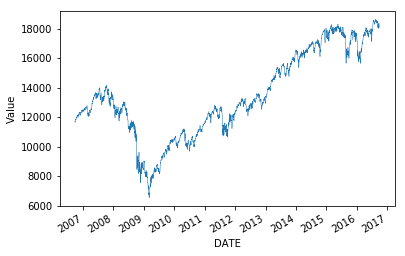

In [2]:
df1 = pd.read_csv("DJIA.csv")
dates = pd.to_datetime(df1.DATE, format='%Y-%m-%d')
df1 = df1.set_index(dates).drop("DATE", axis=1)
df1 = pd.to_numeric(df1.VALUE, errors='coerce')
df1 = df1.dropna()
df1.plot(lw=0.5)
plt.ylabel("Value")
plt.show()

### Problem 2

<function matplotlib.pyplot.show(*args, **kw)>

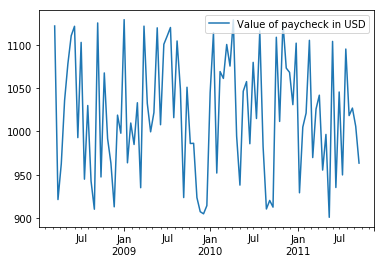

In [3]:
df2 = pd.read_csv("paychecks.csv", header=-1)
df2.index = pd.date_range(start="2008/03/13", freq='2W-FRI', periods=93)
df2.columns = ["Value of paycheck in USD"]
df2.plot()
plt.show

### Problem 5

In [4]:
df3 = pd.read_csv("DJIA.csv")
dates = pd.to_datetime(df3.DATE, format='%Y-%m-%d')
df3 = df3.set_index(dates).drop("DATE", axis=1)
df3.VALUE = pd.to_numeric(df3.VALUE, errors='coerce')
diff = df3 - df3.shift(1)
print("The single day with the largest gain: ", df3.VALUE.idxmax())
print("The single day with the largest loss: ", df3.VALUE.idxmin())
mth = df3.resample('M').first()
mdiff = mth.diff()
print("The month with the largest gain: ", mdiff.VALUE.idxmax())
print("The month with the largest loss: ", mdiff.VALUE.idxmin())

The single day with the largest gain:  2016-08-15 00:00:00
The single day with the largest loss:  2009-03-09 00:00:00
The month with the largest gain:  2015-11-30 00:00:00
The month with the largest loss:  2015-09-30 00:00:00


### Problem 6

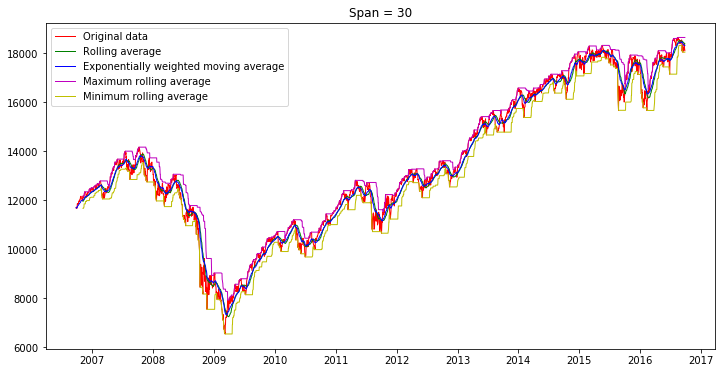

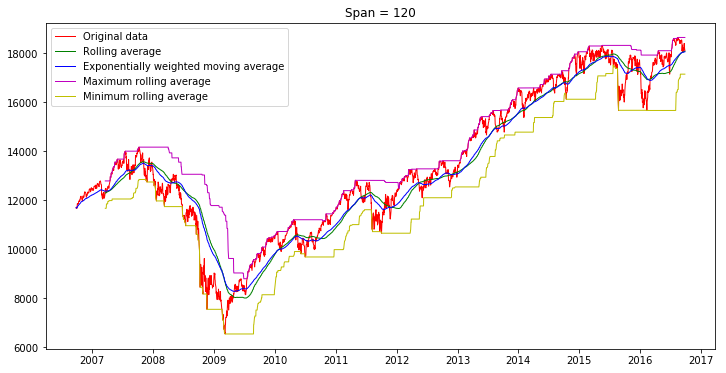

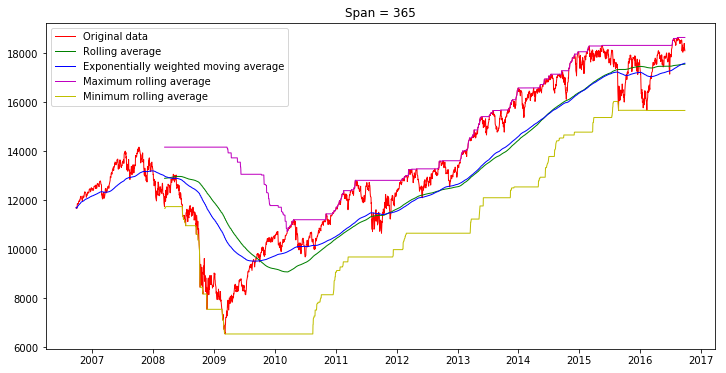

In [5]:
df3 = df3.dropna()
span = [30,120,365]
for i in span:
    plt.figure(figsize=(12,6))
    plt.plot(df3.index, df3.values, color='r',lw=1, label="Original data")
    plt.plot(df3.rolling(window=i).mean() , color='g', lw=1, label="Rolling average")
    plt.plot(df3.index, df3.ewm(span=i).mean(), color='b', lw=1, label="Exponentially weighted moving average")
    plt.plot(df3.index, df3.rolling(window=i).max(), 'm', lw=1, label="Maximum rolling average")
    plt.plot(df3.index, df3.rolling(window=i).min(), 'y', lw=1, label="Minimum rolling average")
    plt.legend()
    plt.title("Span = " + str(i))
    plt.show()